In [1]:
import numpy as np
from helpers import train_test, traincb, plot_comparison
import xgboost as xgb
%matplotlib inline

In [2]:
train, test = train_test()
params = {"objective": "reg:linear",
          "eta": 0.01,
          "max_depth": 6}

In [3]:
from lr_callbacks import dynamic_lr, bold_driver, mc_clain, stc, TrackGradMean, PredictLoss, BaseLR

# decrease_function - takes current LR as input, returns a new one
# rounds_function - takes number of LR decreases, returns allowed number of iterations that dont reduce eval score before applying decrease_function 
dynamic_lr = dynamic_lr(start_lr=0.5, min_lr=0.0001, decrease_function=lambda x: x*0.5, rounds_function=lambda x: int(5*x**1.6))
bold_driver = bold_driver(start_lr=0.5, min_lr=0.005, boldness=1.005, timidness=0.5, relax=5, relax_k=2)
mc_clain = mc_clain(start_lr=0.5, target_lr=0.001)
stc = stc(start_lr=0.25, T=150)
# track_mean = TrackGradMean(trainset=train, howto=np.median, a=1e-1, b1=.8, b2=.8)
with_prediction = PredictLoss(lr=.1, evals=[(test, "val_0")])

In [4]:
callbacks_to_test = [[], [stc], [bold_driver], [mc_clain], [with_prediction]]

In [5]:
gbms = []

In [6]:
for i, cbs in enumerate([[with_prediction]]):
    gbms.append(
        xgb.train(dtrain=train, callbacks=cbs, params=params, num_boost_round=1000, early_stopping_rounds=15,
                  verbose_eval=False, evals=[(test, "val_0")]))

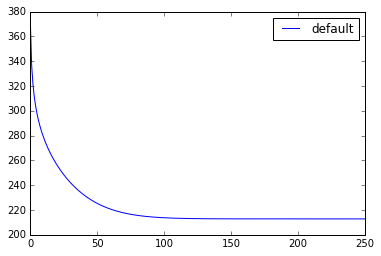

In [9]:
plot_comparison([[with_prediction]])

In [22]:
g = gbms[0]

In [7]:
with_prediction.tag

'PredictLoss/trace_0'

In [22]:
%%bash 
ls

__pycache__
ferresbook.ipynb
hackedXGB.ipynb
helpers.py
lr_0005_d_6_standard
lr_001_d_6_standard
lr_01_d_6_standard
lr_callbacks.py
objectives.py
test.csv
train.csv
traintest
xgb_0_log.txt
xgb_1_log.txt
xgb_2_log.txt
xgb_3_log.txt
xgb_4_log.txt


In [11]:
with_prediction.tag

'PredictLoss/trace_1'

In [10]:
with_prediction.evals

[(<xgboost.core.DMatrix at 0x10939def0>, 'val_0')]

In [14]:
b'[4]\tval_0-rmse:358.637115'

b'[4]\tval_0-rmse:358.637115'